In [1]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("drugsComTrain_raw.csv")
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [3]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [6]:
df_train = df[(df["condition"] == "Birth Control") | (df["condition"] == "Depression") | (df["condition"] == "Diabetes, Type 2") | (df["condition"] == "High Blood Pressure")]

In [7]:
df.shape

(161297, 7)

In [8]:
df_train.shape

(42732, 7)

In [10]:
df_train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [11]:
X = df_train.drop(['drugName','rating','date','usefulCount' ], axis=1)

In [13]:
X.head()

uniqueID      condition                                             review
2      92703  Birth Control  "I used to take another oral contraceptive, wh...
3     138000  Birth Control  "This is my first time using any form of birth...
9      48928  Birth Control  "I had been on the pill for many years. When m...
11     75612     Depression  "I have taken anti-depressants for years, with...
14     98494  Birth Control  "Started Nexplanon 2 months ago because I have...

In [14]:
X = X.drop(["uniqueID"],axis=1)
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [24]:
X_birth=X[(X['condition' ] == 'Birth Control')]
X_dep=X[(X['condition' ] == 'Depression' )]
X_bp=X[(X['condition' ] == 'High Blood Pressure')]
X_diab=X[ (X['condition'] == 'Diabetes, Type 2' ) ]

In [18]:
pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     -------                                 61.4/300.2 kB 1.1 MB/s eta 0:00:01
     -----------                           92.2/300.2 kB 880.9 kB/s eta 0:00:01
     ------------------------------------   286.7/300.2 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Word cloud for Birth control')

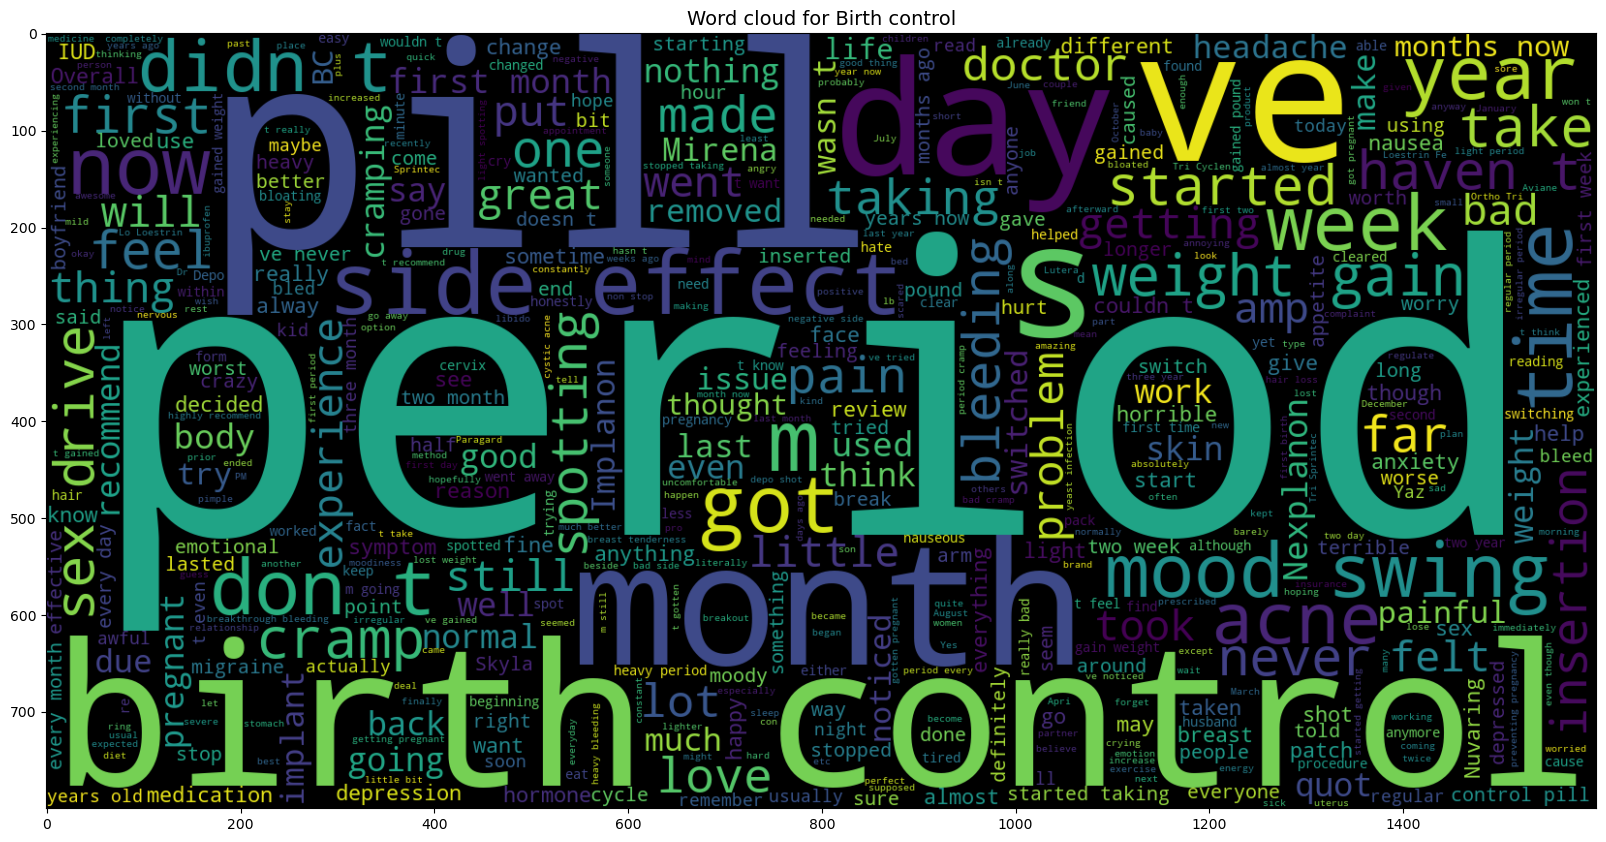

In [20]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , 
               height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control', fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

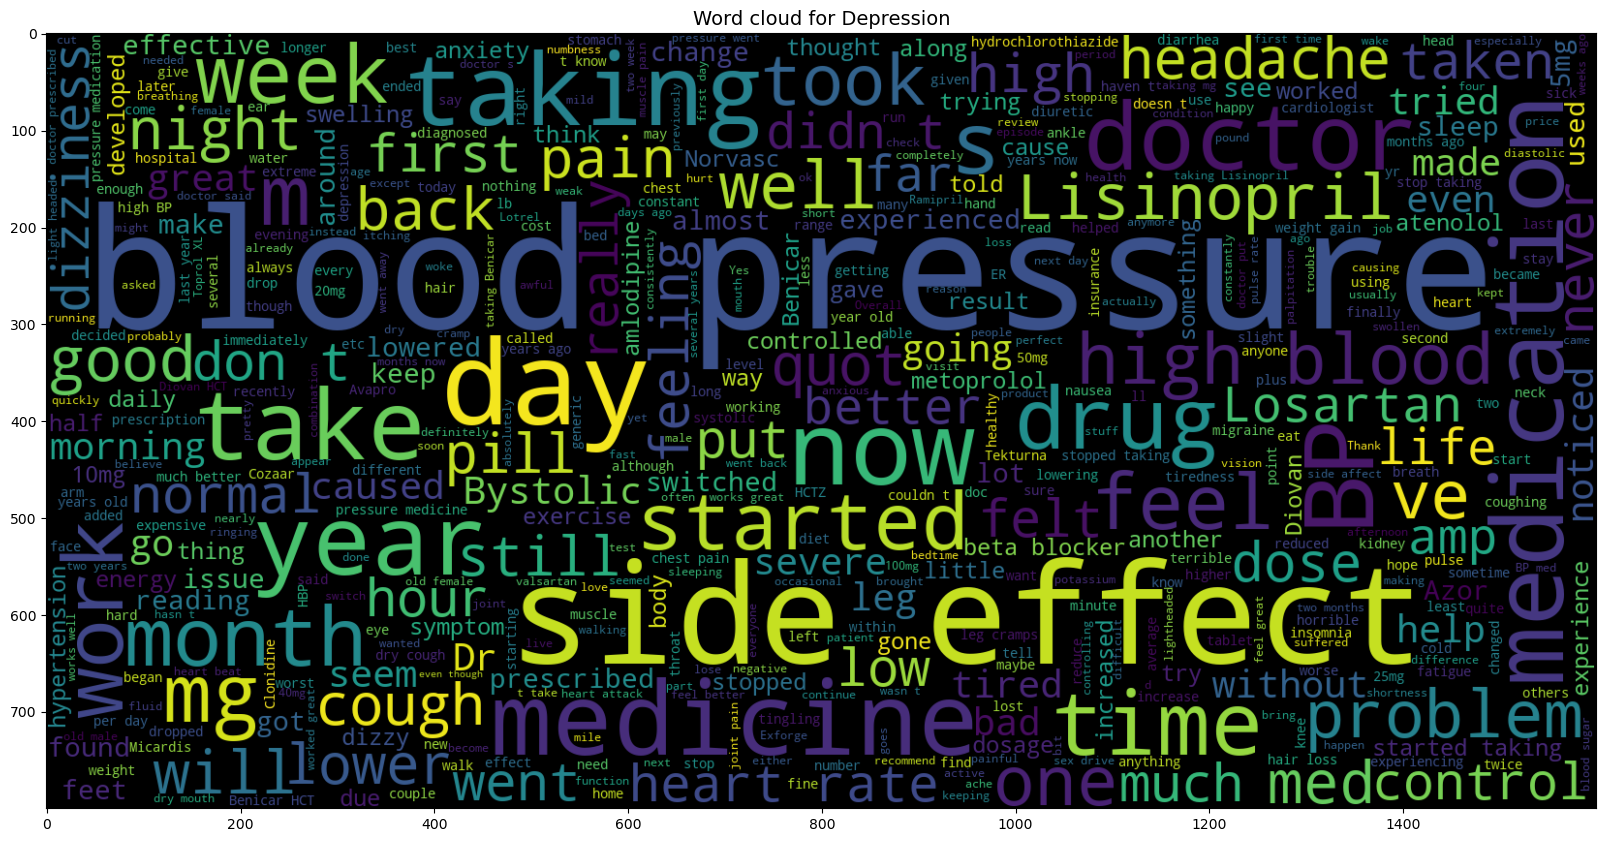

In [26]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
WC = WordCloud(max_words = 500 , width = 1600 , 
               height = 800).generate(" ".join(X_bp.review))
plt.imshow(WC , interpolation = 'bilinear')
plt.title('Word cloud for Depression', fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

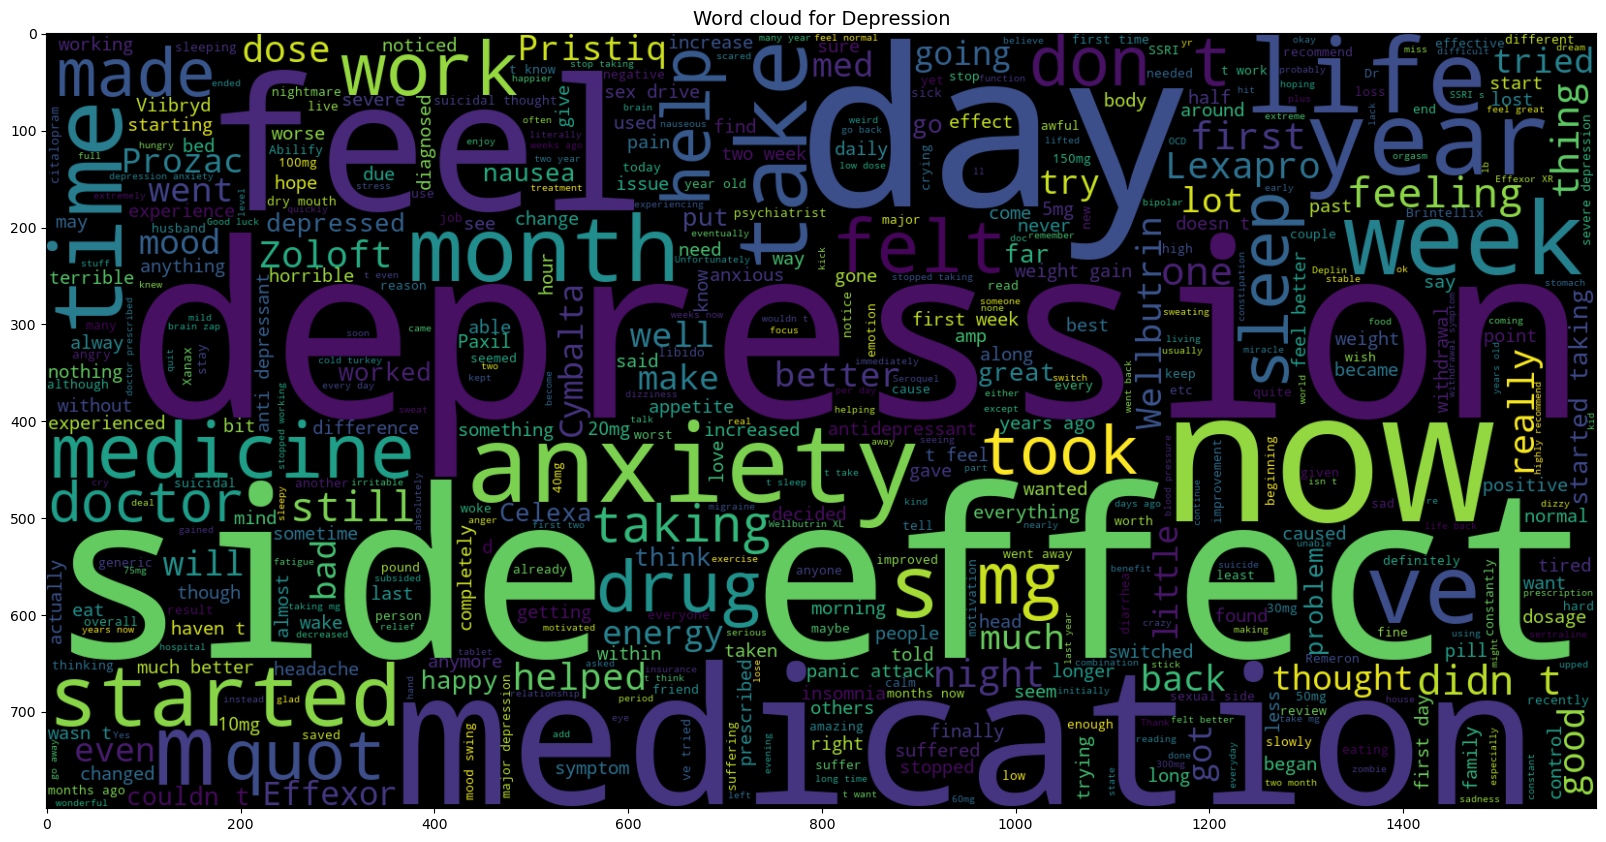

In [27]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
WC = WordCloud(max_words = 500 , width = 1600 , 
               height = 800).generate(" ".join(X_dep.review))
plt.imshow(WC , interpolation = 'bilinear')
plt.title('Word cloud for Depression', fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

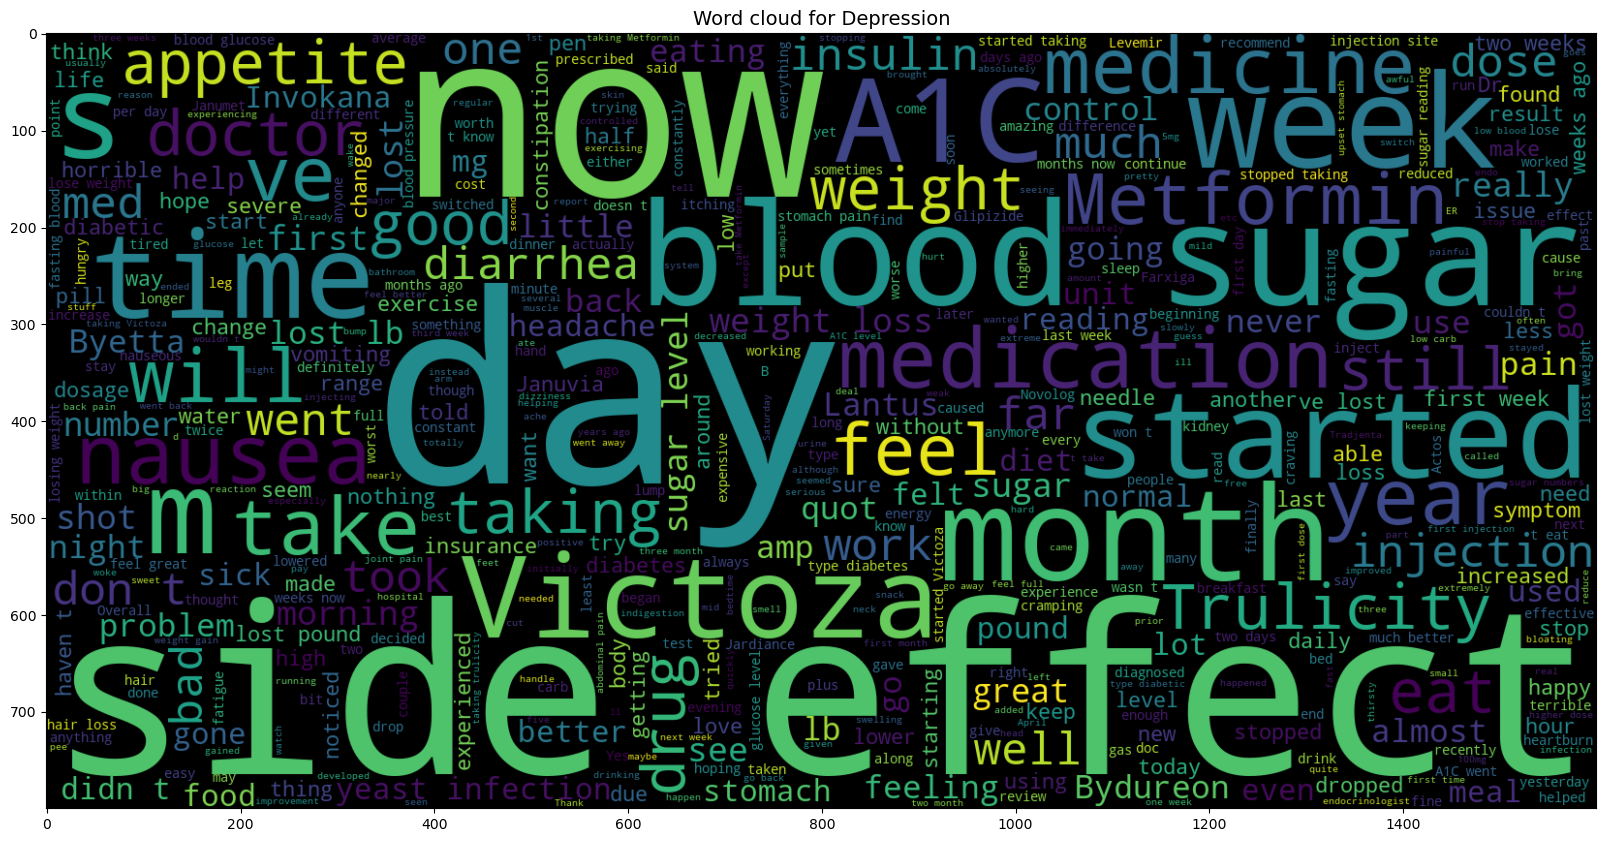

In [28]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
WC = WordCloud(max_words = 500 , width = 1600 , 
               height = 800).generate(" ".join(X_diab.review))
plt.imshow(WC , interpolation = 'bilinear')
plt.title('Word cloud for Depression', fontsize=14)

In [30]:
X["review"][3]

'"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"'

In [32]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

X.head()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_8076\3014720454.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                 
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                      
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                     
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                               

In [38]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...


In [54]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [55]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [56]:
from bs4 import BeautifulSoup
import re

In [57]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. Lower Letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. Lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return(' '.join(lemmitize_words))

In [58]:
X['review_clean'] = X['review'].apply(review_to_words)

X.head()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_8076\3629436330.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                  
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                       
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                      
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                           

In [60]:
X_feat = X['review_clean']
y = X['condition']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, stratify=y,
                                        test_size=0.2, random_state = 0)

In [67]:
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Naive Beyas

In [65]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics. accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

accuracy: 0.970


Confusion matrix, without normalization


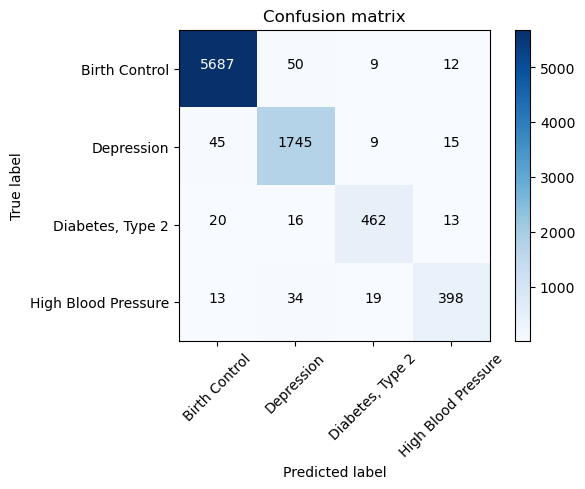

In [68]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 
                    'Depression','Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression',
                                   'Diabetes, Type 2', 'High Blood Pressure'])

# Passive Aggressive Classifier

accuracy: 0.978
Confusion matrix, without normalization


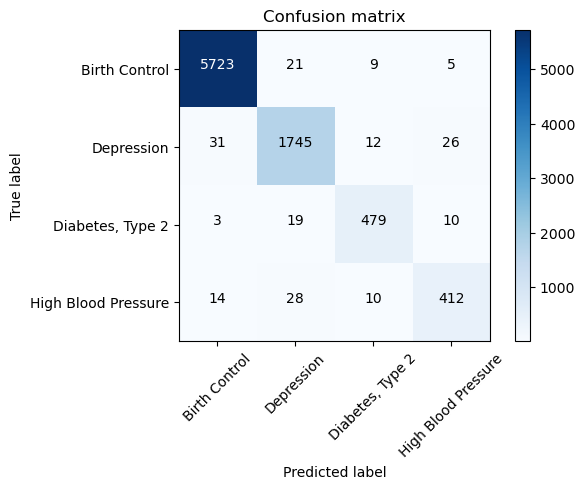

In [69]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics. accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 
                    'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression',
                                   'Diabetes, Type 2', 'High Blood Pressure'])

# TFIDF

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

accuracy: 0.921
Confusion matrix, without normalization


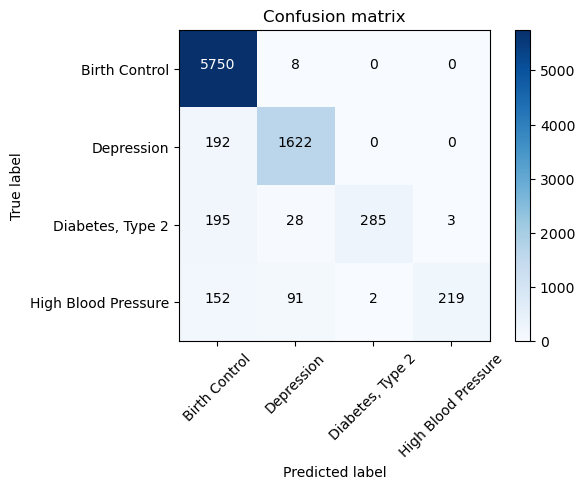

In [71]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics. confusion_matrix(y_test, pred, labels=['Birth Control', 
                     'Depression','Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression',
                                   'Diabetes, Type 2', 'High Blood Pressure'])

accuracy: 0.981
Confusion matrix, without normalization


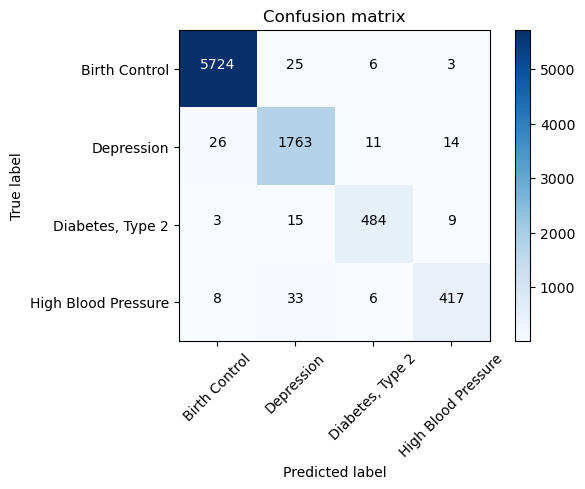

In [85]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer. fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 
                    'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression',
                                   'Diabetes, Type 2', 'High Blood Pressure'])



# TFIDF: Bigrams

accuracy: 0.985
Confusion matrix, without normalization


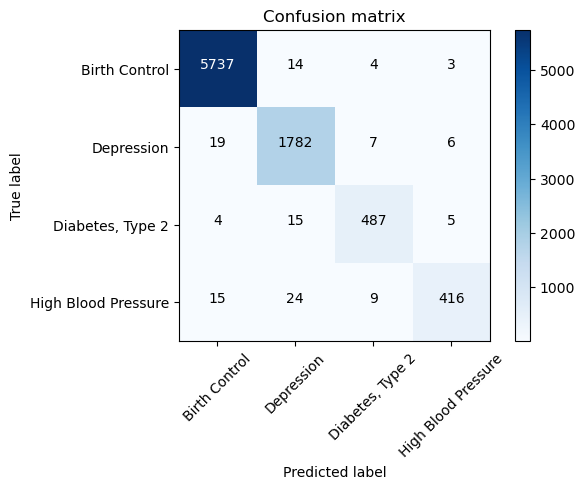

In [76]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, 
                                    ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 
                    'Depression','Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression',
                                   'Diabetes, Type 2', 'High Blood Pressure'])



# TFIDF: Trigrams

accuracy: 0.985
Confusion matrix, without normalization


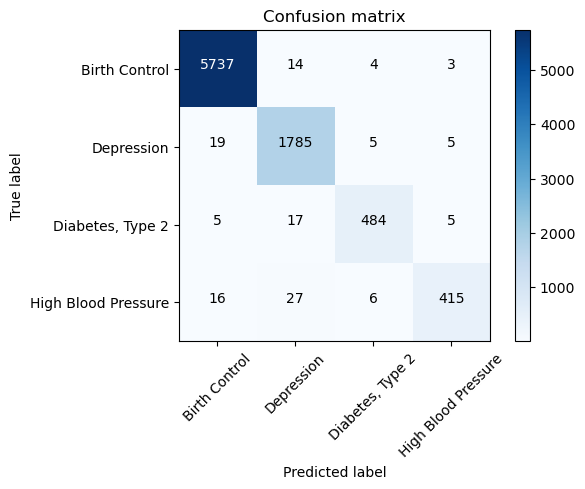

In [77]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, 
                                    ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 
                    'Depression','Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression',
                                   'Diabetes, Type 2', 'High Blood Pressure'])



# Most Important Features

In [79]:
def most_informative_feature_for_class(vectorizer, classifier,classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)

most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control packaged 0.4921270548731718
Birth Control aesthetician 0.504236671274823
Birth Control addon 0.5126758028292763
Birth Control bubble 0.515019788713359
Birth Control tricyclone 0.5198150351017069
Birth Control tricylcen 0.5198150351017069
Birth Control correct 0.6016316836013582
Birth Control tiny 0.60961966615025
Birth Control commit 1.409529353541157
Birth Control freeway 7.12455619044287


In [80]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 
                                   'Depression')

Depression therefor 0.5445153783514602
Depression dine 0.5725732481358363
Depression sink 0.5771614497966181
Depression develope 0.6583704136523315
Depression sinnce 0.6605485759343446
Depression assaulted 0.8836316994326155
Depression significantly 0.8999119902001463
Depression subjective 1.0784918793460743
Depression apnea 1.1140156988551502
Depression aliveness 3.715230085929329


In [81]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 
                                   'High Blood Pressure')

High Blood Pressure folic 0.5398154454690361
High Blood Pressure fatter 0.5445849559849233
High Blood Pressure fattest 0.5445849559849233
High Blood Pressure fluctuation 0.5997631389867407
High Blood Pressure barley 0.6153166034389608
High Blood Pressure end 0.6334557040863171
High Blood Pressure encouraged 0.6490086099669231
High Blood Pressure enforcement 0.6525768275942162
High Blood Pressure shine 0.7755868584353212
High Blood Pressure folk 1.0472476920850662


In [82]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 
                                   'Diabetes, Type 2')

Diabetes, Type 2 enjoyable 0.3325584507656632
Diabetes, Type 2 enjoyed 0.3325584507656632
Diabetes, Type 2 prom 0.4344286108954475
Diabetes, Type 2 addon 0.4426134136150493
Diabetes, Type 2 aesthetician 0.5270892982140143
Diabetes, Type 2 base 0.554726759466923
Diabetes, Type 2 proliferating 0.6628665459234662
Diabetes, Type 2 orthotricyclenlo 0.760299347627207
Diabetes, Type 2 fot 0.7811288367695959
Diabetes, Type 2 problem 2.9555517149791366


# Sample Predictions

In [83]:
X.tail()

condition  \
161273  Birth Control         
161278  Diabetes, Type 2      
161286  Depression            
161290  High Blood Pressure   
161291  Birth Control         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161273  I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.   
161278  I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me                                                                                                                                                                                                                                                                                                                                                                                                    
161286  This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.                                                                                                                                                                                                                                                                                                                                                                                          
161290  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.                                                                                                                                                                                   
161291  This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(                                                                                                                                                                                                                           

                                                                                                                          

In [86]:
text = ["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Depression'

In [87]:
text2 = ["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test2 = tfidf_vectorizer.transform(text2)
pred2 = pass_tf.predict(test2)[0]
pred2

'Depression'